In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn missingno

Exploratory Data Analysis

In [93]:
# importing necessary Llibraries: 
import pandas as pd # importing the dataframe and it is used for data cleaning and analysis. 
import numpy as np # used for working with arrays 
import seaborn as sns # used for plotting statistical graphics 
import matplotlib.pyplot as plt # used to create 2D graphs and plots 
import missingno as msno # used to visualize missing data in the dataset
import warnings # warnings module suppresses repeated warnings from the same source to cut down on the annoyance of seeing the same message over and over.
warnings.filterwarnings("ignore") # ignore warnings

In [111]:
# reading the dataset

df = pd.read_csv(r"D:\Guvi_Project\Household_energy_usage_forecast\individual+household+electric+power+consumption\household_power_consumption.txt", sep=';')

In [95]:
# dataset overview
# univariate analysis
df.info() # gives the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [96]:
df.head() # gives the first 5 rows of the dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [112]:
# Ensure 'Datetime' is in datetime format
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# set the index to be the Datetime column
df.set_index('Datetime', inplace=True)

# Drop original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Parse date and time into separate features.
# Extract time-based features
Hour = df.index.hour
Day = df.index.day
Month = df.index.month
Weekday = df.index.weekday

# changing the datatype of the 'Global_active_power' column to float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# changing the datatype of the 'Global_reactive_power' column to float
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')

# changing the datatype of the 'Voltage' column to float
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# changing the datatype of the 'Global_intensity' column to float
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

# changing the datatype of the 'Sub_metering_1' column to float
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')

# changing the datatype of the 'Sub_metering_2' column to float
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [98]:
# gives the information about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [99]:
df.describe() # gives the statistical information about the dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [100]:
df.shape # gives the shape of the dataset

(2075259, 7)

In [101]:
df.head() # gives the first 5 rows of the dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [102]:
df.columns # gives the columns of the dataset

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

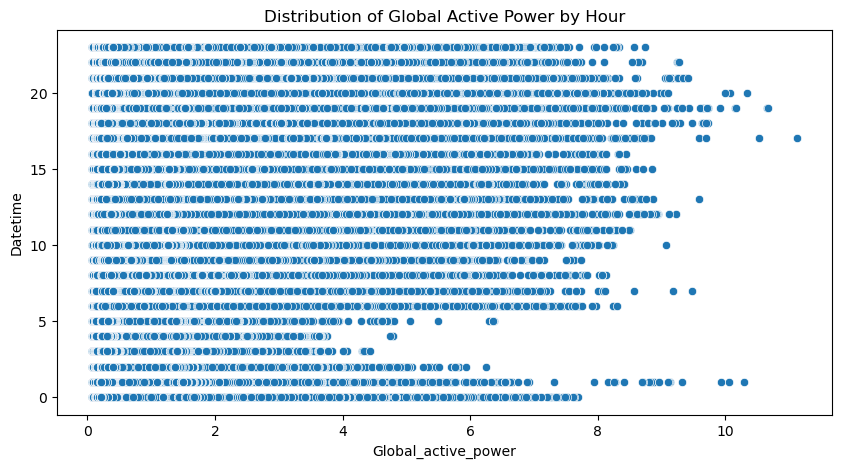

In [103]:
# Bi-variate analysis

# visualizing the distribution of the peak power consumption by hourly basis
# here we can see that the peak power consumption is between 6pm to 9pm
# and the lowest power consumption is between 6am to 9am
plt.figure(figsize=(10, 5))
sns.scatterplot(data = df, x = "Global_active_power", y =Hour)
plt.title('Distribution of Global Active Power by Hour')
plt.show()

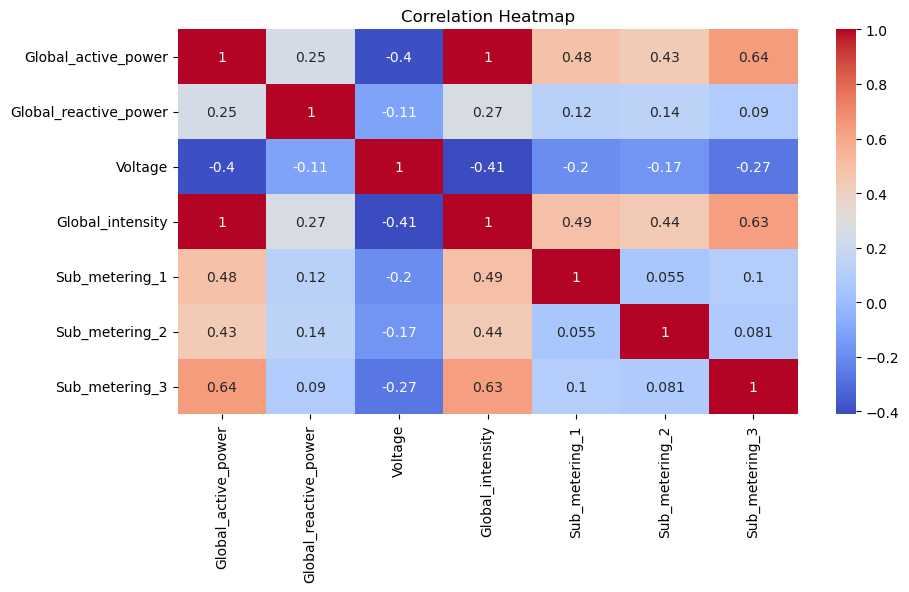

In [104]:
# multivariate analysis

# visualizing the correlation between the features
# here we can see that the 'Global_intensity' and 'Global_active_power' are highly correlated
# and the 'Voltage' and 'Global_active_power' are negatively correlated
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Data Preprocessing

<Axes: >

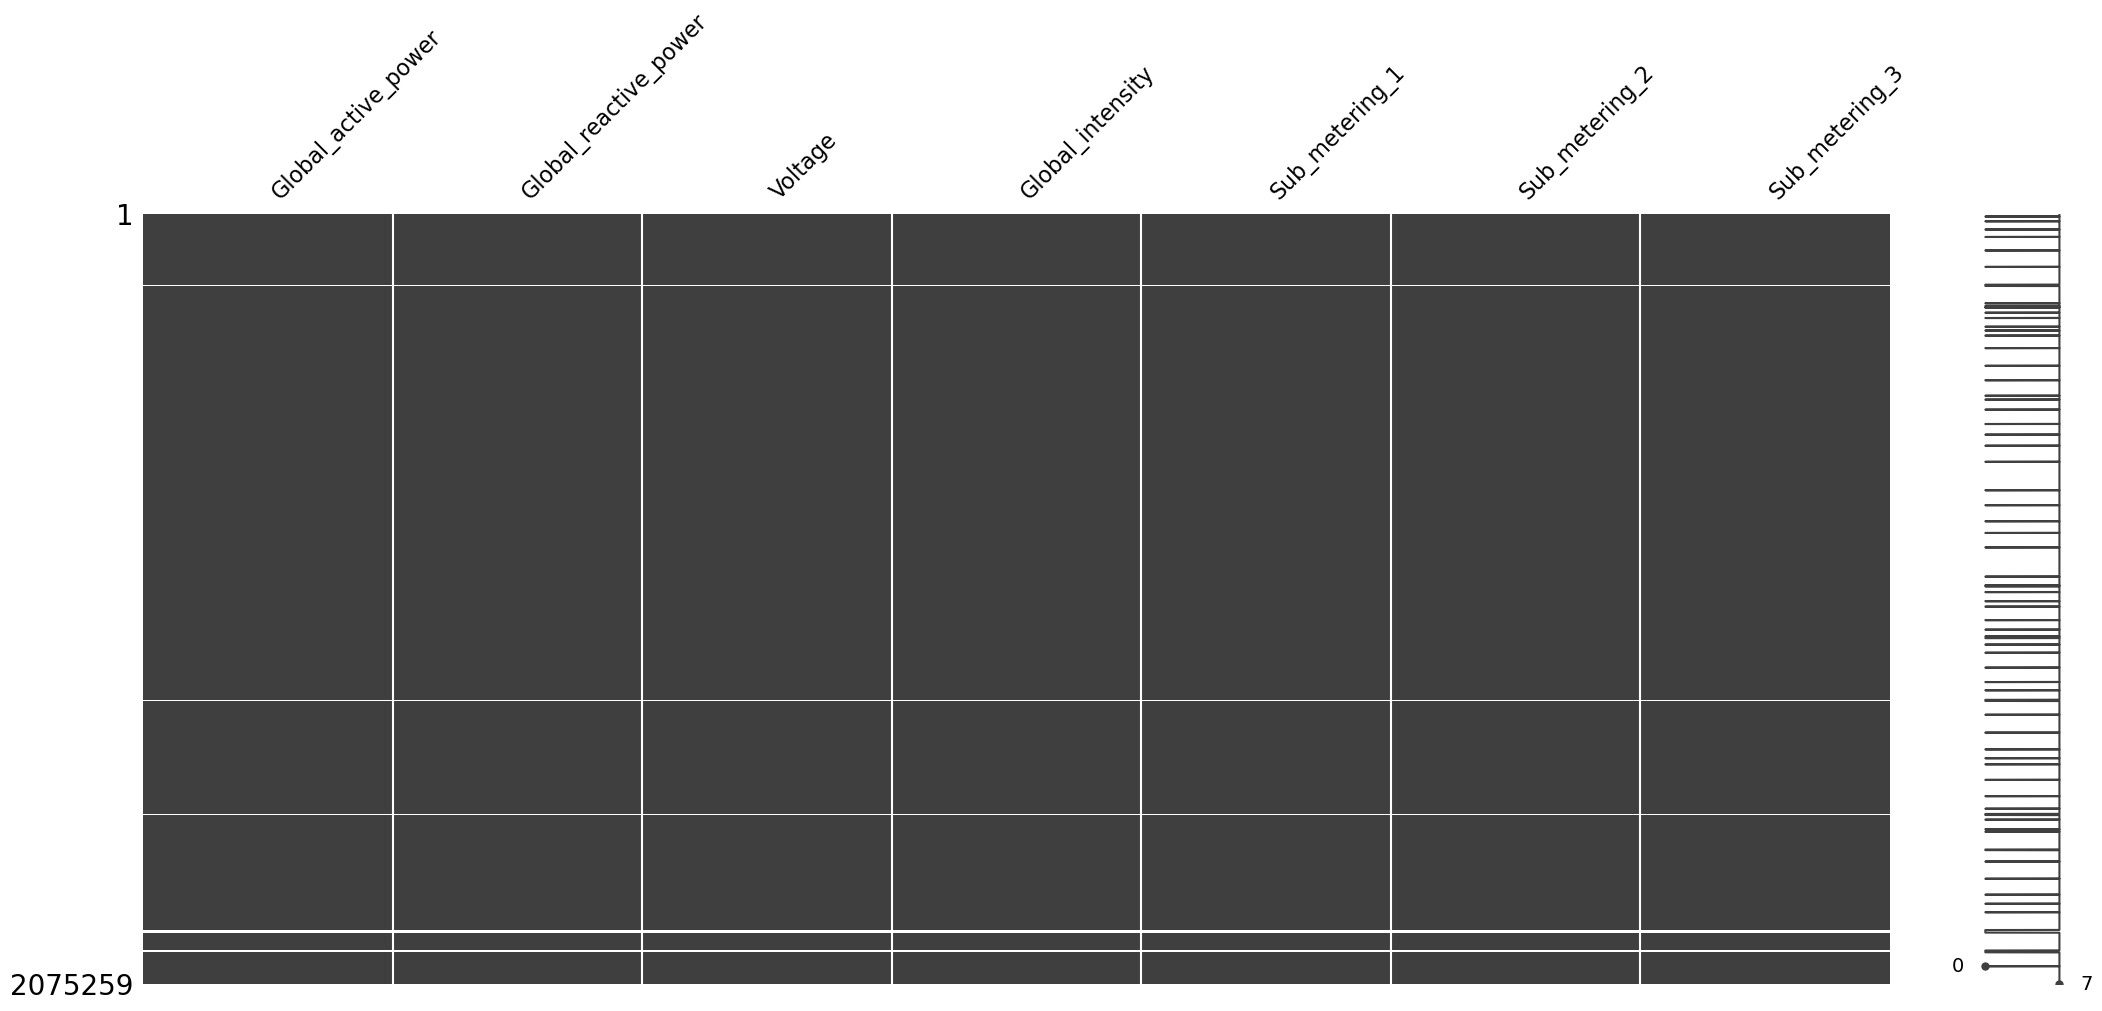

In [105]:
# checking for missing values in the dataset

msno.matrix(df) # gives the visualization of missing values in the dataset

In [113]:
# here we can see that there are missing values in the dataset other than the 'Date' and 'Time' columns
# I am going to fill the missing values with the mean of the respective columns and check the model performance. if it is not good then I need to use the alternative method to fill the missing values.
# Alternate method for missing numerical data : Ask client -> BA -> SME -> Mean -> Median -> Mode -> STD -> ffill -> bfill -> interolate -> KNN -> dropna.

# filling the missing values with the mean of the respective columns
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)
df.isnull().sum() # gives the sum of null values in each column

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Feature Scaling : Data Reduction

In [114]:
# Normalizing the dataset
# Normalization is used to scale the data of the dataset so that all the data points lie between 0 and 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()
# now we are going to use the scaled data for the model building

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.973749,2.627217,-1.863517,3.118369,-0.183489,-0.051598,1.257315
1,4.062593,2.787911,-2.239335,4.159920,-0.183489,-0.051598,1.138043
2,4.075918,3.341412,-2.344937,4.159920,-0.183489,0.121249,1.257315
3,4.089243,3.377122,-2.205170,4.159920,-0.183489,-0.051598,1.257315
4,2.450266,3.609235,-1.602618,2.529666,-0.183489,-0.051598,1.257315


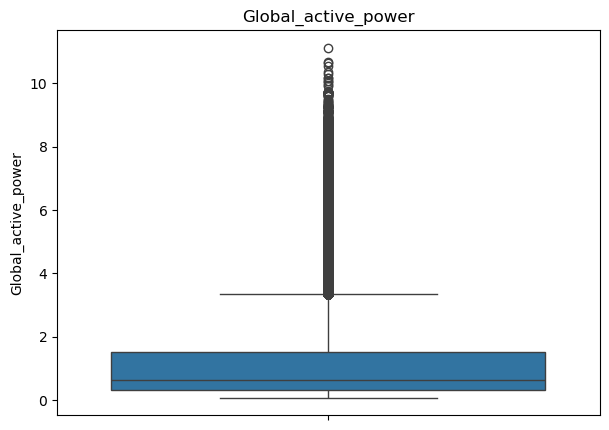

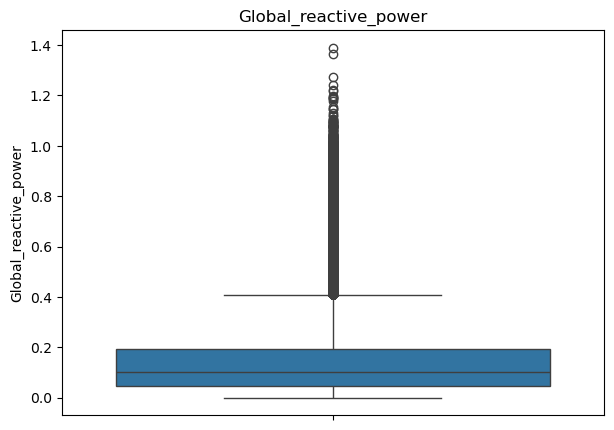

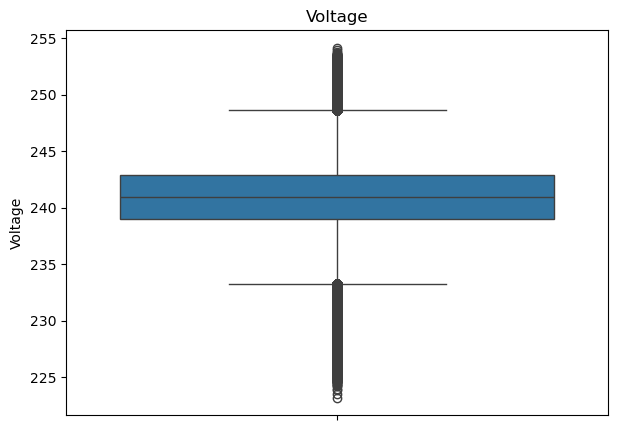

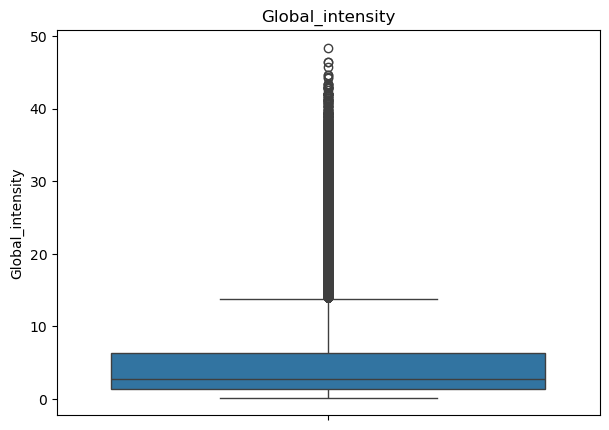

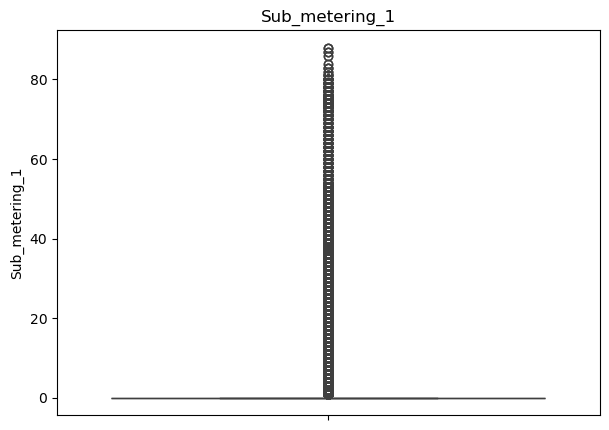

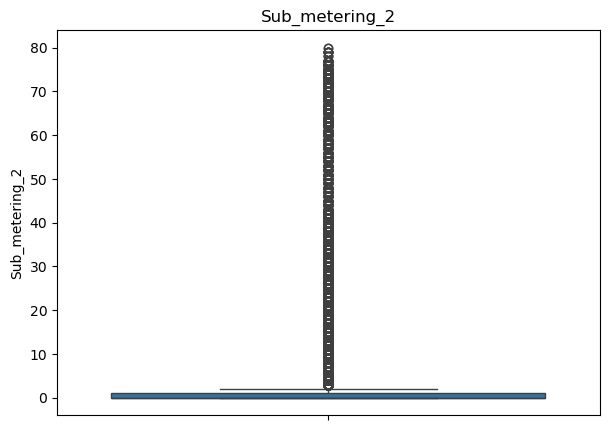

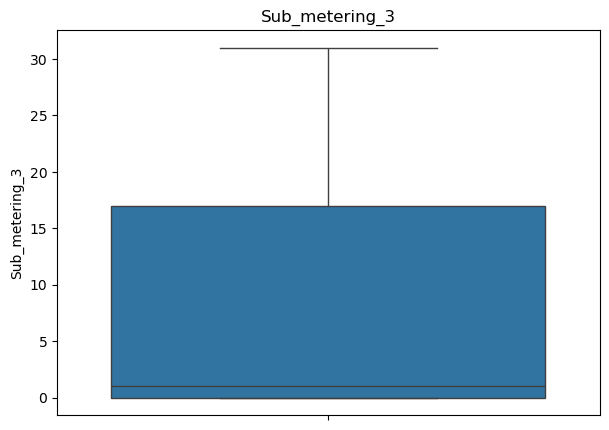

In [115]:
# checking for the outliers in the dataset
# boxplot is used to visualize the outliers in the dataset
# After visualizing the outliers we can decide whether to remove the outliers or not.
for col in scaled_df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()
    

In [116]:
from scipy.stats.mstats import winsorize
# winsorizing the outliers in the dataset
scaled_df['Global_active_power'] = winsorize(scaled_df['Global_active_power'], limits=[0.05, 0.05])
scaled_df['Global_reactive_power'] = winsorize(scaled_df['Global_reactive_power'], limits=[0.05, 0.05])
scaled_df['Voltage'] = winsorize(scaled_df['Voltage'], limits=[0.05, 0.05])
scaled_df['Global_intensity'] = winsorize(scaled_df['Global_intensity'], limits=[0.05, 0.05])
scaled_df['Sub_metering_1'] = winsorize(scaled_df['Sub_metering_1'], limits=[0.1, 0.1])
scaled_df['Sub_metering_2'] = winsorize(scaled_df['Sub_metering_2'], limits=[0.05, 0.05])


In [117]:
# using z-score to detect the outliers in the dataset
# z-score is used to detect the outliers in the dataset
# if the z-score is greater than 3 then it is an outlier

for col in scaled_df.columns:
    print(col)
    col_mean = scaled_df[col].mean()
    col_std = scaled_df[col].std()
    threshold = 3
    outliers = []
    for i in scaled_df[col]:
        z = (i - col_mean) / col_std
        if abs(z) > threshold:
            outliers.append(i)
    print(outliers)

Global_active_power
[]
Global_reactive_power
[]
Voltage
[]
Global_intensity
[]
Sub_metering_1
[]
Sub_metering_2
[]
Sub_metering_3
[]


Model Selection and Training:

In [119]:
# Split dataset into train/test sets
from sklearn.model_selection import train_test_split
X = scaled_df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = scaled_df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression Model

In [120]:
# Algorithm Selection
# Linear Regression is used to predict the continuous dependent variable using a given set of independent variables.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Linear_model = LinearRegression()

In [121]:
# Model Training / fitting the model
Linear_model.fit(X_train, y_train)

LinearRegression()

In [122]:
# Model Prediction
y_pred_linear = Linear_model.predict(X_test)

In [123]:
# Model Evaluation
linear_mse = mean_squared_error(y_test, y_pred_linear)
print('Mean Squared Error:', linear_mse)
linear_r2 = r2_score(y_test, y_pred_linear)
print('R2 Score:', linear_r2)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
print('Mean Absolute Error:', linear_mae)


Mean Squared Error: 0.0013336911262276155
R2 Score: 0.9981642946652216
Mean Absolute Error: 0.02333890499327812



Lasso Regresssion model

In [124]:
# importing the Lasso model
# Lasso is used to select the important features of the dataset
from sklearn.linear_model import Lasso
Lasso_model = Lasso()

In [125]:
# Model Training / fitting the model
Lasso_model.fit(X_train, y_train)

Lasso()

In [126]:
# Model Prediction
y_pred_lasso = Lasso_model.predict(X_test)

In [127]:
# Model Evaluation
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print('Mean Squared Error:', lasso_mse)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print('R2 Score:', lasso_r2)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
print('Mean Absolute Error:', lasso_mae)


Mean Squared Error: 0.7265286242939974
R2 Score: -1.0086728636782283e-06
Mean Absolute Error: 0.7159045571182443


Ridge Regression Model

In [128]:
# importing the Ridge model
# Ridge is used to select the important features of the dataset
from sklearn.linear_model import Ridge
ridge_model = Ridge()

In [129]:
# Model Training / fitting the model
ridge_model.fit(X_train, y_train)

Ridge()

In [130]:
# Model Prediction
y_pred_ridge = ridge_model.predict(X_test)

In [131]:
# Model Evaluation
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print('Mean Squared Error:',ridge_mse)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print('R2 Score:', ridge_r2)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
print('Mean Absolute Error:', ridge_mae)

Mean Squared Error: 0.0013336910210076562
R2 Score: 0.9981642948100474
Mean Absolute Error: 0.023338918068869917


Elastinet regression Model

In [132]:
# importing the Elastinet model
# Elastinet is used to select the important features of the dataset
from sklearn.linear_model import ElasticNet 
enet_model = ElasticNet()

In [133]:
# Model Training / fitting the model
enet_model.fit(X_train, y_train)

ElasticNet()

In [134]:
# Model Prediction
y_pred_enet = enet_model.predict(X_test)

In [135]:
# Model Evaluation
enet_mse = mean_squared_error(y_test, y_pred_enet)
print('Mean Squared Error:',enet_mse)
enet_r2 = r2_score(y_test, y_pred_enet)
print('R2 Score:', enet_r2)
enet_mae = mean_absolute_error(y_test, y_pred_enet)
print('Mean Absolute Error:', enet_mae)

Mean Squared Error: 0.4876457476625979
R2 Score: 0.3287996876771375
Mean Absolute Error: 0.5878220474293807


Random Forest Regressor

In [137]:
# importing the RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [138]:
# Model Training / fitting the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [139]:
# Model Prediction
y_pred_rf = rf_model.predict(X_test)

In [140]:
# Model Evaluation
rf_mse = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error:',rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)
print('R2 Score:', rf_r2)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
print('Mean Absolute Error:', rf_mae)

Mean Squared Error: 0.0011450826809913809
R2 Score: 0.998423897149107
Mean Absolute Error: 0.017897643924291964


Gradient Boosting Regressor

In [141]:
# importing the gradient boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

In [142]:
# Model Training / fitting the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [143]:
# Model Prediction
y_pred_gb = gb_model.predict(X_test)

In [144]:
# Model Evaluation
gb_mse = mean_squared_error(y_test, y_pred_gb)
print('Mean Squared Error:',gb_mse)
gb_r2 = r2_score(y_test, y_pred_gb)
print('R2 Score:', rf_r2)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
print('Mean Absolute Error:', gb_mae)

Mean Squared Error: 0.0010923808947302111
R2 Score: 0.998423897149107
Mean Absolute Error: 0.018891611000653112


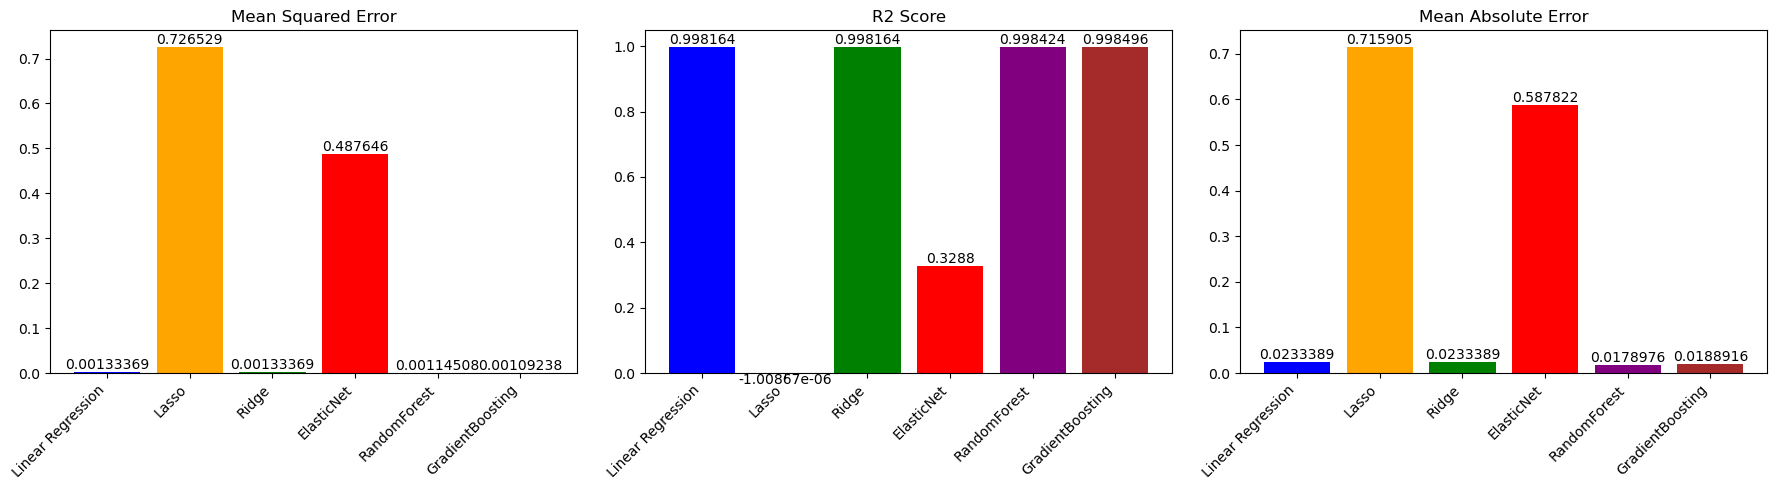

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Create 1 row, 3 columns of subplots

metrics = {
    'Mean Squared Error': [linear_mse, lasso_mse, ridge_mse, enet_mse, rf_mse, gb_mse],
    'R2 Score': [linear_r2, lasso_r2, ridge_r2, enet_r2, rf_r2, gb_r2],
    'Mean Absolute Error': [linear_mae, lasso_mae, ridge_mae, enet_mae, rf_mae, gb_mae]
}

models = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet', 'RandomForest', 'GradientBoosting']

for ax, (title, values) in zip(axes, metrics.items()):
    ax.bar(models, values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
    ax.set_title(title)
    ax.bar_label(ax.containers[0])  # Add labels to bars
    #ax.annotate('Best', xy=(values.index(min(values)), min(values)), xytext=(0.5, 0.5), textcoords='axes fraction',
                #arrowprops=dict(facecolor='black', shrink=0.05))
    ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for better visibility

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
